In [1]:
from random import choice
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

overall population:
            expected value: 40.002535021979405
            standard deviation: 1.0008728312759607
    


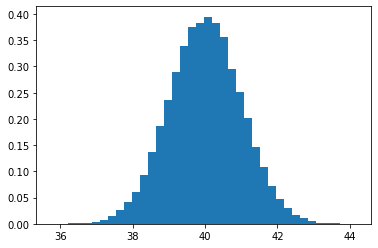

randomly selected items:
            expected value: 39.93733556552979
            standard deviation: 0.7996080339538582
    


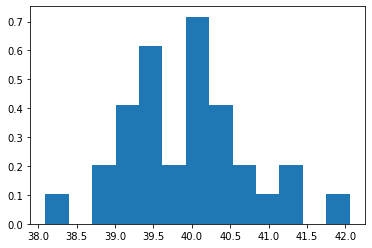

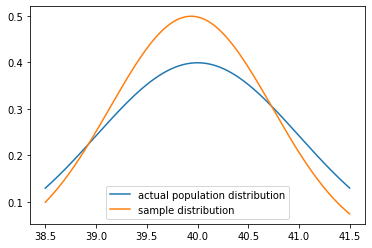

In [2]:
expected_value = lambda values: sum(values) / len(values)
standard_deviation = lambda values, expected_value: np.sqrt(sum([(v - expected_value)**2 for v in values])  / len(values))

# pdf model
np.random.seed(1) #
Nmodel = 2**16
mu, sigma = 40, 1
population = np.random.normal(mu, sigma, Nmodel)
mean = expected_value(population)
Nbins = int(np.ceil(1 + 3.3*np.log(Nmodel)))  #  Sturge’s Rule K = 1 + 3. 322 logN

print(
    '''overall population:
            expected value: {0}
            standard deviation: {1}
    '''.format(mean, standard_deviation(population, mean))
)
plt.hist(population, Nbins, density=True)
plt.show()

# samples selected
Nsample = 2**5
Nbins = int(np.ceil(1 + 3.3*np.log(Nsample)))  
randomly_selected_items = [choice(population) for _ in range(Nsample)]
mean = expected_value(randomly_selected_items)
s_d = standard_deviation(randomly_selected_items, mean)
print(
    '''randomly selected items:
            expected value: {0}
            standard deviation: {1}
    '''.format(mean, s_d))
plt.hist(randomly_selected_items, Nbins, density=True)
plt.show()

# fitting of sampled values
xs = np.arange(mu-1.5*sigma, mu +1.5*sigma, 0.001)
actual_ys = norm.pdf(xs, mu, sigma)
ys = norm.pdf(xs, mean, s_d)
plt.plot(xs, actual_ys, label='actual population distribution')
plt.plot(xs, ys, label='sample distribution')
plt.legend()
plt.show()